In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading in CSV file
df = pd.read_csv('netflix_data.csv')
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,4,In a future where the elite inhabit an island ...,International TV
1,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,4,In a future where the elite inhabit an island ...,International TV


In [3]:
# Overviewing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7849 entries, 0 to 7848
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7849 non-null   object
 1   type          7849 non-null   object
 2   title         7849 non-null   object
 3   director      5444 non-null   object
 4   cast          7130 non-null   object
 5   country       7336 non-null   object
 6   date_added    7839 non-null   object
 7   release_year  7849 non-null   int64 
 8   duration      7849 non-null   int64 
 9   description   7849 non-null   object
 10  genre         7849 non-null   object
dtypes: int64(2), object(9)
memory usage: 674.7+ KB


In [4]:
# Checking for duplicates
df.duplicated().sum()

62

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(7787, 11)

In [7]:
df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7847,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,31-Oct-20,2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV
7848,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United Kingdom,1-Mar-20,2019,90,This documentary delves into the mystique behi...,Documentaries


In [8]:
df = df.reset_index(drop=True)

In [9]:
df.fillna(0, inplace=True)

# Plotting

##### Subsetting the data

In [10]:
df_movies = df.query('`type` == "Movie"')
durations_df_movies = df_movies[['release_year', 'duration',]]

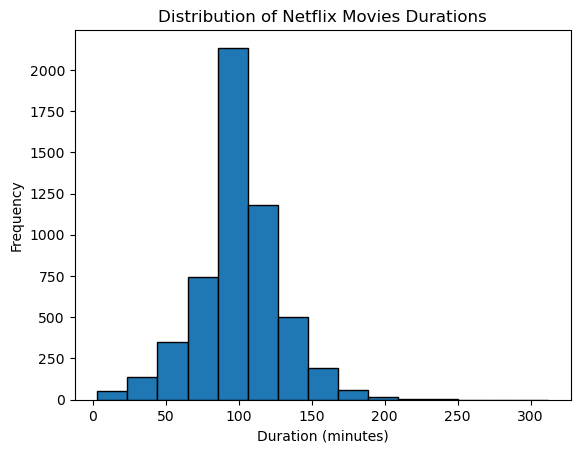

In [11]:
plt.hist(durations_df_movies["duration"], bins=15, edgecolor='black')  
plt.title("Distribution of Netflix Movies Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

In [12]:
df_shows = df.query('`type` == "TV Show"')
durations_df_shows = df_shows[['release_year', 'duration',]]

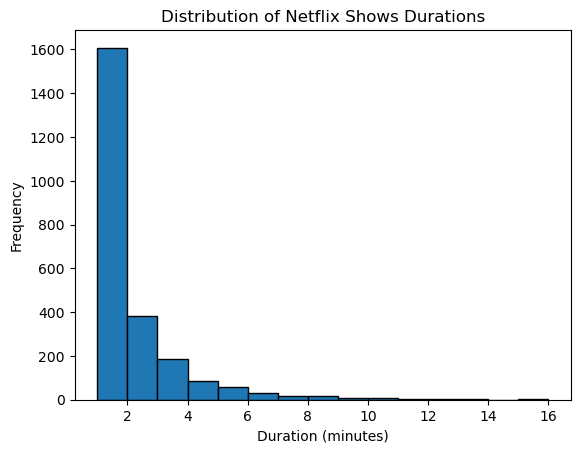

In [13]:
plt.hist(durations_df_shows["duration"], bins=15, edgecolor='black')  
plt.title("Distribution of Netflix Shows Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

In [14]:
df_mexican_movies = df.query('`type` == "Movie" and `country` == "Mexico"')
durations_mexican_movies = df_mexican_movies[['release_year', 'duration',]]

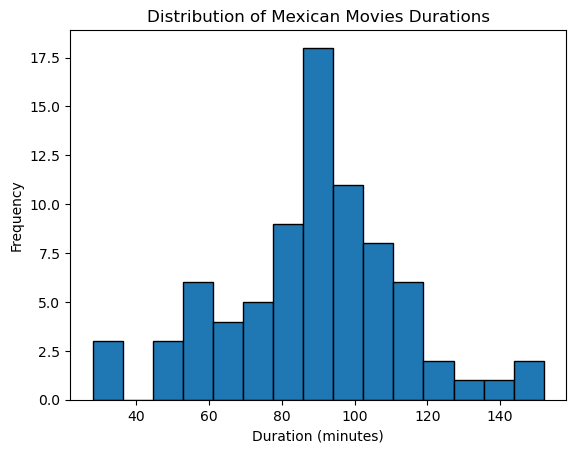

In [15]:
plt.hist(durations_mexican_movies["duration"], bins=15, edgecolor='black')  
plt.title("Distribution of Mexican Movies Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

In [16]:
df_horror_movies = df.query('`type` == "Movie" and `genre` == "Horror Movies"')
durations_horror_movies = df_horror_movies[['release_year', 'duration',]]

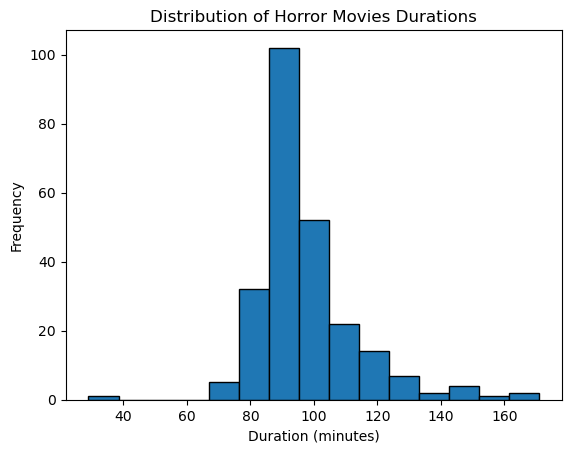

In [17]:
plt.hist(durations_horror_movies["duration"], bins=15, edgecolor='black')  
plt.title("Distribution of Horror Movies Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

In [18]:
df_genre = df["genre"].value_counts().head(10).sort_values()

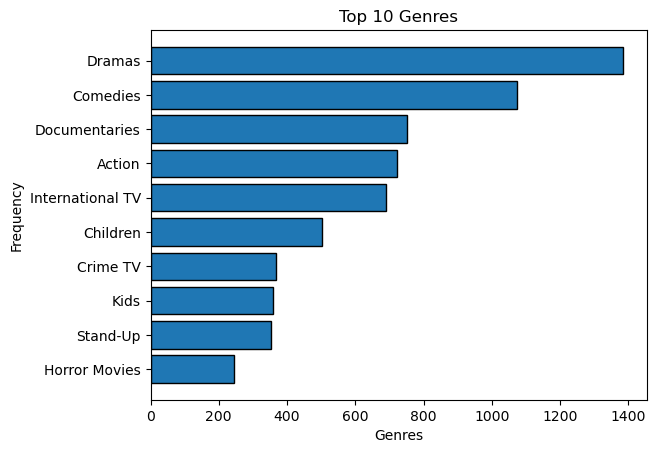

In [23]:
plt.barh(df_genre.index, df_genre.values, edgecolor='black')  
plt.title("Top 10 Genres")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.show()

In [20]:
df_low_genre = df["genre"].value_counts().tail(10).sort_values()

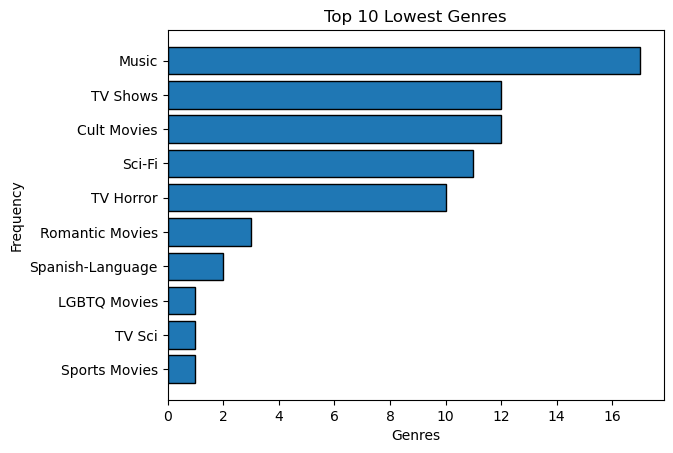

In [24]:
plt.barh(df_low_genre.index, df_low_genre.values, edgecolor='black')  
plt.title("Top 10 Lowest Genres")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.show()